In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [4]:
all_mut_df = pd.read_pickle('./out_assoc_gen_feats.pkl')
len(all_mut_df)

7670

In [5]:
# Get unique entries from the condition columns
cond_cols = [
    'media_description', 'carbon_source',
    'nitrogen_source', 'phosphorous_source', 'sulfur_source',
    'calcium_source', 'supplement', 'temperature', 'strain',
    'strain_details']
uniq_conds = set()
for c in cond_cols:
    uniq_conds.update(all_mut_df[c].unique())
len(uniq_conds)

72

Preprocessing mutation set for shorter for loop runtime

In [6]:
ros_exp_mut_df = all_mut_df[
    (all_mut_df.supplement.isin(['paraquat','PQ(0.8mM)']))
    | (all_mut_df.tech_rep_description=='20uM FeSO4 and 10mM sodium citrate')
]
len(ros_exp_mut_df)

351

In [7]:
ros_conds = {'paraquat','PQ(0.8mM)','20uM FeSO4 and 10mM sodium citrate'}


ros_assoc_mut_df = pd.DataFrame()
for _, m in ros_exp_mut_df.iterrows():
    for f in m['genetic features']:
        if len(ros_conds & f['significantly associated conditions']) > 0:
            ros_assoc_mut_df = pd.concat([
                ros_assoc_mut_df,
                m
            ], axis=1)
            break

ros_assoc_mut_df = ros_assoc_mut_df.T
ros_assoc_mut_df

,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,mutation target annotation,Reference Seq,ALEdb source,sample,coding,exp ALE,range,gene RegulonDB ID,genetic features,afir,media_description,carbon_source,nitrogen_source,phosphorous_source,sulfur_source,calcium_source,supplement,temperature,strain,strain_details,taxonomy_id,tech_rep_description
2925,Iron-ALE,17,45,1,1,1.0,4159126,SNP,G→C,A213P (GCG→CCG),oxyR,NC_000913,public,17 45 1 1,True,Iron-ALE 17,"(4159126, 4159126)",{ECK120000674},"[{'name': 'oxyR', 'RegulonDB ID': 'ECK12000067...",A17 F45 I1 R1,M9,glucose(4g/L),NH4Cl(1),"KH2PO4(3),Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1),,37,511145.0,NC_000913,,20uM FeSO4 and 10mM sodium citrate
2926,Iron-ALE,18,39,1,1,1.0,2067837,SNP,G→T,pseudogene (56/435 nt),yoeG,NC_000913,public,18 39 1 1,False,Iron-ALE 18,"(2067837, 2067837)",{ECK125240970},"[{'name': 'yoeG', 'RegulonDB ID': 'ECK12524097...",A18 F39 I1 R1,M9,glucose(4g/L),NH4Cl(1),"KH2PO4(3),Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1),,37,511145.0,NC_000913,,20uM FeSO4 and 10mM sodium citrate
2927,Iron-ALE,18,39,1,1,1.0,3815859,DEL,Δ82 bp,,rph,NC_000913,public,18 39 1 1,True,Iron-ALE 18,"(3815859, 3815940)",{ECK120000854},"[{'name': 'rph', 'RegulonDB ID': 'ECK120000854...",A18 F39 I1 R1,M9,glucose(4g/L),NH4Cl(1),"KH2PO4(3),Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1),,37,511145.0,NC_000913,,20uM FeSO4 and 10mM sodium citrate
2928,Iron-ALE,18,39,1,1,1.0,4159112,SNP,G→A,C208Y (TGT→TAT),oxyR,NC_000913,public,18 39 1 1,True,Iron-ALE 18,"(4159112, 4159112)",{ECK120000674},"[{'name': 'oxyR', 'RegulonDB ID': 'ECK12000067...",A18 F39 I1 R1,M9,glucose(4g/L),NH4Cl(1),"KH2PO4(3),Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1),,37,511145.0,NC_000913,,20uM FeSO4 and 10mM sodium citrate
2929,Iron-ALE,19,39,1,1,1.0,331806,SNP,G→A,intergenic (+310/‑565),"betT, yahA",NC_000913,public,19 39 1 1,False,Iron-ALE 19,"(331806, 331806)",{},"[{'RegulonDB ID': 'ECK120000108/ECK120001214',...",A19 F39 I1 R1,M9,glucose(4g/L),NH4Cl(1),"KH2PO4(3),Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1),,37,511145.0,NC_000913,,20uM FeSO4 and 10mM sodium citrate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,ROS_eAMP,29,18,0,1,1.0,3041634,SNP,A→C,T108P (ACC→CCC),ygfZ,NC_000913,public,29 18 0 1,True,ROS_eAMP 29,"(3041634, 3041634)",{ECK120004073},"[{'name': 'ygfZ', 'RegulonDB ID': 'ECK12000407...",A29 F18 I0 R1,M9,glucose(2g/L),NH4Cl(1),"KH2PO4(3),Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1),paraquat,37,511145.0,BOP1000,,
3774,ROS_eAMP,29,71,0,1,1.0,3473615,SNP,C→T,W156* (TGG→TAG),rpsG,NC_000913,public,29 71 0 1,True,ROS_eAMP 29,"(3473615, 3473615)",{ECK120000897},"[{'name': 'rpsG', 'RegulonDB ID': 'ECK12000089...",A29 F71 I0 R1,M9,glucose(2g/L),NH4Cl(1),"KH2PO4(3),Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1),paraquat,37,511145.0,BOP1000,,
3776,ROS_eAMP,29,18,0,1,1.0,3815859,DEL,Δ82 bp,,[rph],NC_000913,public,29 18 0 1,True,ROS_eAMP 29,"(3815859, 3815940)",{ECK120000854},"[{'name': 'rph', 'RegulonDB ID': 'ECK120000854...",A29 F18 I0 R1,M9,glucose(2g/L),NH4Cl(1),"KH2PO4(3),Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1),paraquat,37,511145.0,BOP1000,,
3777,ROS_eAMP,29,119,0,1,1.0,4033595,SNP,C→A,P151T (CCT→ACT),trkH,NC_000913,public,29 119 0 1,True,ROS_eAMP 29,"(4033595, 4033595)",{ECK120001010},"[{'name': 'trkH', 'RegulonDB ID': 'ECK12000101...",A29 F119 I0 R1,M9,glucose(2g/L),NH4Cl(1),"KH2PO4(3),Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1),paraquat,37,511145.0,BOP1000,,


In [8]:
mut_gen_cond_assoc_df = pd.read_csv("./data/mut_gen_cond_assocs.csv")
mut_gen_cond_assoc_df.head()

,mutated features,condition,odd ratio,p value
0,C0299/umuD,37,0.0,1.000000e+00
1,C0299/umuD,38,0.0,1.000000e+00
2,C0299/umuD,42,0.0,1.000000e+00
3,C0299/umuD,511145.0,0.0,1.000000e+00
4,C0299/umuD,NaN,inf,1.446202e-18


In [9]:
assoc_gen_feat_df = mut_gen_cond_assoc_df[
    (mut_gen_cond_assoc_df['condition'].isin(ros_conds))
    & (mut_gen_cond_assoc_df['p value'] < 0.01)
]
assoc_gen_feat_df.head()

,mutated features,condition,odd ratio,p value
1854,aceE,paraquat,26.425456,2.569582e-20
3150,acs/nrfA,paraquat,29.630561,2.487864e-03
7848,arcB,paraquat,16.376203,1.397158e-04
9063,arnA,paraquat,29.938416,1.068421e-07
9387,aroC/prmB,paraquat,29.630561,2.487864e-03


In [10]:
# Just to see what features are actually associated with ROS stress.

ros_assoc_gen_feat_cnt_d = dict()
for _, m in all_mut_df.iterrows():
    for f in m['genetic features']:
        if f['name'] in set(assoc_gen_feat_df['mutated features']):
        # if len(ros_conds & f['significantly associated conditions']) > 0:
            if f['name'] not in ros_assoc_gen_feat_cnt_d.keys():
                ros_assoc_gen_feat_cnt_d[f['name']] = 0
            ros_assoc_gen_feat_cnt_d[f['name']] += 1
ros_assoc_gen_feat_cnt_d

{'rph': 100,
 'pyrE/rph': 221,
 'hns/tdk': 59,
 'rpoB': 128,
 'arcB': 7,
 'aceE': 22,
 'oxyR': 47,
 'lon': 8,
 'yheS': 2,
 'glnX': 12,
 'sucA': 18,
 'gltA': 11,
 'zwf': 11,
 'betT/pdeL': 2,
 'gspD': 2,
 'brnQ': 3,
 'mepM': 4,
 'icd': 126,
 'rpsG': 11,
 'yoeG': 2,
 'ydcC': 5,
 'yegK': 1,
 'bdcA': 1,
 'iscR': 35,
 'trkH': 9,
 'ydbK/ydbJ': 4,
 'renD/emrE': 6,
 'nuoG': 3,
 'aroC/prmB': 2,
 'ygfZ': 19,
 'fur': 6,
 'sdhA': 4,
 'acs/nrfA': 2,
 'aroG': 2,
 'pitA': 10,
 'thiC/rsd': 7,
 'nuoM': 3,
 'gltT/rrlB': 2,
 'arnA': 6,
 'pncA': 2}

In [11]:
ros_assoc_gen_feat_cnt_df = pd.DataFrame(list(ros_assoc_gen_feat_cnt_d.items()),columns = ['target','sum']).set_index('target')
ros_assoc_gen_feat_cnt_df.head()

,sum
target,
rph,100
pyrE/rph,221
hns/tdk,59
rpoB,128
arcB,7


In [12]:
import numpy as np


assoc_mat_df = pd.DataFrame(0, columns=ros_assoc_gen_feat_cnt_d.keys(), index=set(assoc_gen_feat_df['condition']))
for cond, row in assoc_mat_df.iterrows():
    for feat in row.index:
        df = mut_gen_cond_assoc_df[
            (mut_gen_cond_assoc_df['condition']==cond)
            & (mut_gen_cond_assoc_df['mutated features']==feat)
        ]
        odds_ratio = df.iloc[0]['odd ratio']  # assuming only ever 1 row with iloc usage
        log_odds_ratio = 0
        if odds_ratio != 0:
            log_odds_ratio = np.log10(odds_ratio)
        assoc_mat_df.at[cond, feat] = log_odds_ratio

assoc_mat_df

,rph,pyrE/rph,hns/tdk,rpoB,arcB,aceE,oxyR,lon,yheS,glnX,sucA,gltA,zwf,betT/pdeL,gspD,brnQ,mepM,icd,rpsG,yoeG,ydcC,yegK,bdcA,iscR,trkH,ydbK/ydbJ,renD/emrE,nuoG,aroC/prmB,ygfZ,fur,sdhA,acs/nrfA,aroG,pitA,thiC/rsd,nuoM,gltT/rrlB,arnA,pncA
20uM FeSO4 and 10mM sodium citrate,1.308358,0.958160,0.000000,0.000000,0.000000,0.000000,1.795433,0.000000,2.497414,0.000000,0.000000,0.000000,0.000000,2.497414,2.497414,0.000000,0.00000,0.000000,0.000000,2.844082,2.088163,2.817792,2.817792,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
paraquat,0.684143,0.331122,0.919407,0.600685,1.214213,1.422022,0.466263,1.153473,0.000000,1.440802,1.252644,1.329425,1.111406,0.000000,0.000000,1.282641,1.15132,1.012751,1.009923,0.000000,0.000000,0.000000,0.000000,1.181716,1.100185,1.15132,1.476229,1.472857,1.47174,1.49117,1.476229,1.15132,1.47174,1.47174,1.480768,1.477359,1.472857,1.47174,1.476229,1.47174


In [13]:
assoc_mat_df.rename(index={'20uM FeSO4 and 10mM sodium citrate':'FeSO4'}, inplace=True)
assoc_mat_df

,rph,pyrE/rph,hns/tdk,rpoB,arcB,aceE,oxyR,lon,yheS,glnX,sucA,gltA,zwf,betT/pdeL,gspD,brnQ,mepM,icd,rpsG,yoeG,ydcC,yegK,bdcA,iscR,trkH,ydbK/ydbJ,renD/emrE,nuoG,aroC/prmB,ygfZ,fur,sdhA,acs/nrfA,aroG,pitA,thiC/rsd,nuoM,gltT/rrlB,arnA,pncA
FeSO4,1.308358,0.958160,0.000000,0.000000,0.000000,0.000000,1.795433,0.000000,2.497414,0.000000,0.000000,0.000000,0.000000,2.497414,2.497414,0.000000,0.00000,0.000000,0.000000,2.844082,2.088163,2.817792,2.817792,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
paraquat,0.684143,0.331122,0.919407,0.600685,1.214213,1.422022,0.466263,1.153473,0.000000,1.440802,1.252644,1.329425,1.111406,0.000000,0.000000,1.282641,1.15132,1.012751,1.009923,0.000000,0.000000,0.000000,0.000000,1.181716,1.100185,1.15132,1.476229,1.472857,1.47174,1.49117,1.476229,1.15132,1.47174,1.47174,1.480768,1.477359,1.472857,1.47174,1.476229,1.47174


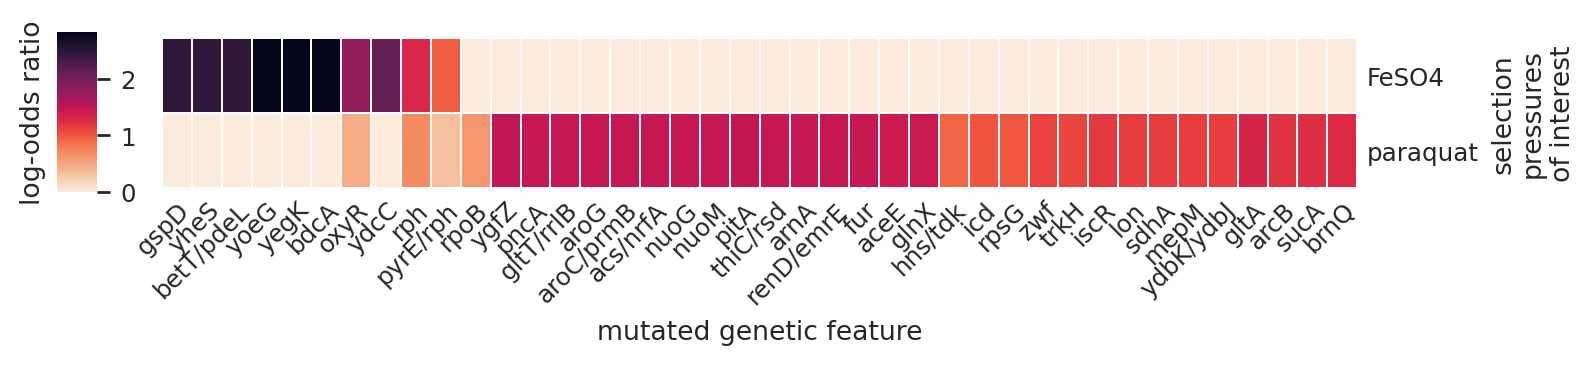

In [14]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams["figure.dpi"] = 200
sns.set_context("paper")
sns.set_style("white")

df = assoc_mat_df.copy()

cm = sns.clustermap(
    df,
    cmap="rocket_r", linewidth=0.1,
    # figsize=(2 ,5.5),
    figsize=(8,2),
    cbar_kws={'label': 'log-odds ratio'},
    xticklabels=1  # Forces yticklabels to be shown for all plot sizes
    # yticklabels=1  # Forces yticklabels to be shown for all plot sizes
)
cm.ax_heatmap.tick_params(axis='y', which='both', length=0, rotation=0)
cm.ax_heatmap.tick_params(axis='x', which='both', length=0,
# pad=55
)
plt.setp(cm.ax_heatmap.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
cm.ax_heatmap.set_xlabel('mutated genetic feature',
# rotation=270,
# labelpad=10
)
cm.ax_heatmap.set_ylabel('selection\npressures\nof interest')

cm.ax_col_dendrogram.set_visible(False)
cm.ax_row_dendrogram.set_visible(False)

cm.ax_cbar.set_position((0.14, 0.45, 0.025, 0.4))
cm.ax_cbar.yaxis.set_label_position('left')
plt.savefig("f3a.svg")
plt.show()